In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [16]:
# Load dataset
df = pd.read_csv("Mall_Customers.csv")

In [17]:
# Select features for clustering
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

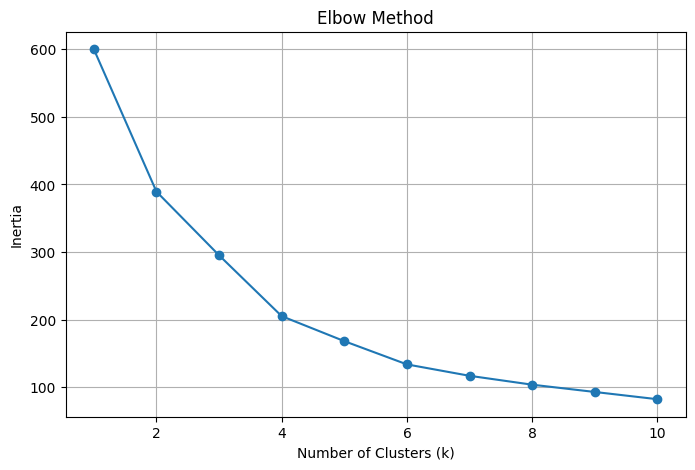

In [18]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [19]:
# Based on Elbow Method, we choose k=5
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

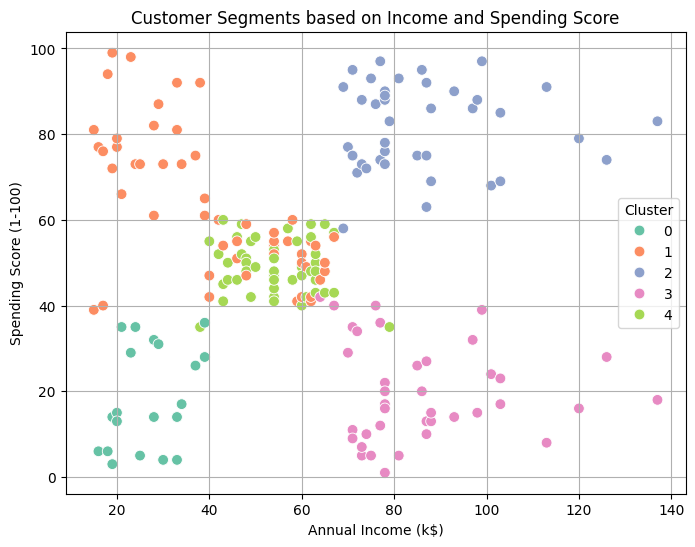

In [20]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df['Annual Income (k$)'],
    y=df['Spending Score (1-100)'],
    hue=df['Cluster'],
    palette='Set2',
    s=60
)
plt.title('Customer Segments based on Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [21]:
# Calculate average values for each cluster
cluster_summary = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().round(1)
cluster_summary = cluster_summary.reset_index()

# Assign segment names manually based on observation
segment_names = {
    0: "Careful High Income",
    1: "Budget Spenders",
    2: "VIP Customers",
    3: "Low Income, Low Spending",
    4: "Potential Targets"
}

cluster_summary["Segment"] = cluster_summary["Cluster"].map(segment_names)
cluster_summary

,Cluster,Age,Annual Income (k$),Spending Score (1-100),Segment
0,0,46.2,26.8,18.4,Careful High Income
1,1,25.2,41.1,62.2,Budget Spenders
2,2,32.9,86.1,81.5,VIP Customers
3,3,39.9,86.1,19.4,"Low Income, Low Spending"
4,4,55.6,54.4,48.9,Potential Targets


## Cluster Interpretation

After applying K-Means and analyzing the average values per cluster, I labeled each segment based on their behavior:

- **Cluster 0 – Careful High Income**: Customers with high income but low spending. Possibly savings-focused or selective buyers.
- **Cluster 1 – Budget Spenders**: Customers with low income but high spending. May be impulsive or discount-driven buyers.
- **Cluster 2 – VIP Customers**: High income and high spending — ideal for premium offers and loyalty programs.
- **Cluster 3 – Low Income, Low Spending**: Least active group, may need targeted outreach.
- **Cluster 4 – Potential Targets**: Middle-class customers with relatively high spending — worth investing in personalized marketing.

This segmentation helps the business design more tailored strategies per group.
